# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Import passengers.csv and set it as a time-series object. Plot the TS
TS = pd.read_csv('passengers.csv')
pd.to_datetime(TS['Month'])
TS.set_index('Month',inplace = True)
TS.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [2]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(ts):
    #Rolling stats
    rm = ts.rolling(window = 10,center = False).mean()
    sd = ts.rolling(window = 10,center = False).std()
    
    plt.figure(figsize=(12,8))
    plt.plot(ts, color = 'b')
    plt.plot(rm, color = 'r')
    plt.plot(sd, color = 'g')
    plt.show()
    
    #Dickey fuller test
    dftest = adfuller(ts['#Passengers'])
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#logs used','#obs used'])
    print(dfoutput)    

Use your newly created function on the airpassenger data set.

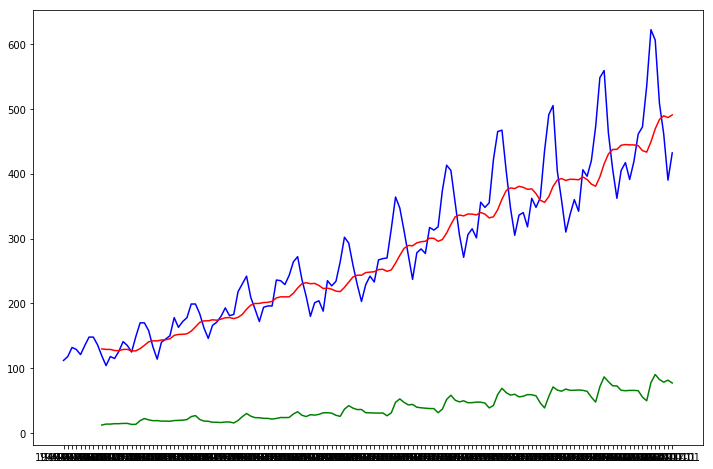

Test Statistic      0.815369
p-value             0.991880
#logs used         13.000000
#obs used         130.000000
dtype: float64


In [3]:
# Code here
stationarity_check(TS)

## Perform a log() and sqrt() transform

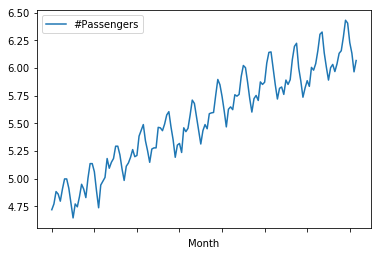

In [4]:
# Log transform timeseries and compare with original to check the effect
ts_log = np.log(TS)
ts_log.plot()

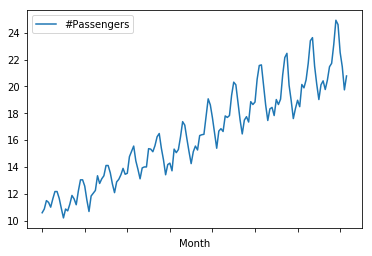

In [5]:
ts_sqrt = np.sqrt(TS)
ts_sqrt.plot()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [6]:
# your code here

rm_log = ts_log.rolling(window =7, center = False).mean()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [7]:
# Subtract the moving average from the original data and check head for Nans
TS_log_rm = ts_log - rm_log

In [8]:
# Drop the NaN values from timeseries calculated above
TS_log_rm = TS_log_rm.dropna()

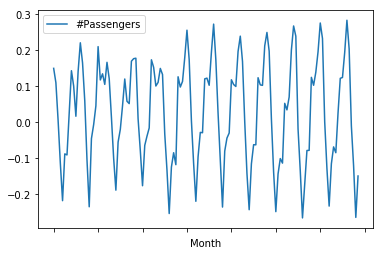

In [9]:
# Plot the result
TS_log_rm.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

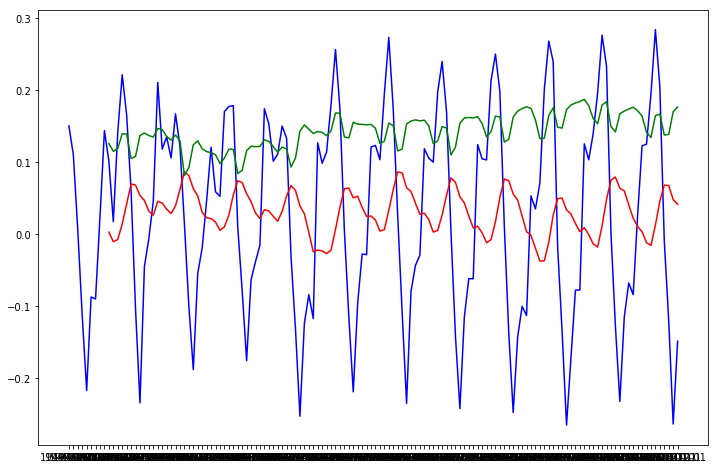

Test Statistic     -2.348027
p-value             0.156946
#logs used         14.000000
#obs used         123.000000
dtype: float64


In [10]:
stationarity_check(TS_log_rm)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

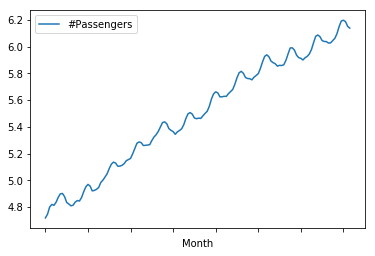

In [11]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
ts_lg_ewma = ts_log.ewm(halflife = 4).mean()
# Plot the original data with exp weighted average
ts_lg_ewma.plot()

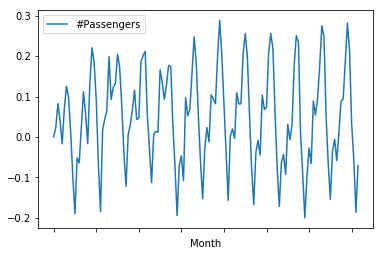

In [12]:
# Subtract the moving average from the original data and plot
ts_new = ts_log - ts_lg_ewma
ts_new.plot()

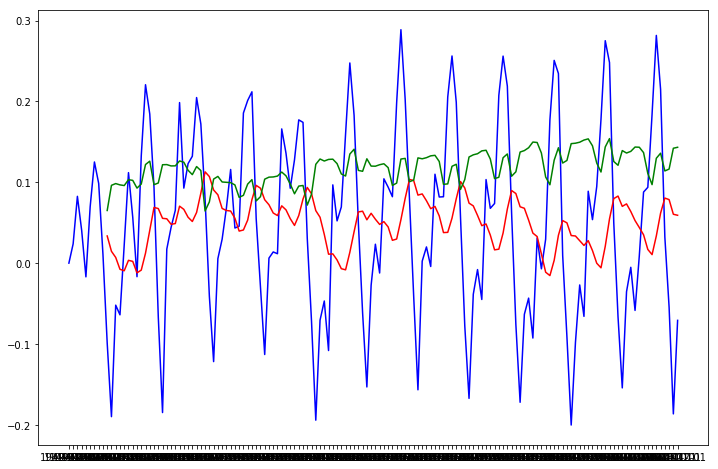

Test Statistic     -3.297250
p-value             0.015002
#logs used         13.000000
#obs used         130.000000
dtype: float64


In [13]:
# do a stationarity check
stationarity_check(ts_new)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [35]:
# difference your data and look at the head
df_diff = ts_new.diff(periods = 11)

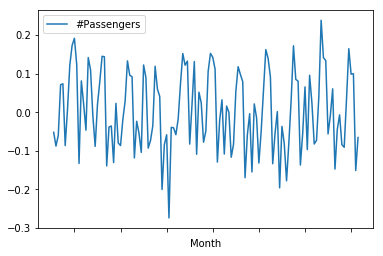

In [36]:
# plot your differenced time series
df_diff.plot()

In [37]:
# drop nas
df_diff.dropna(inplace=True)

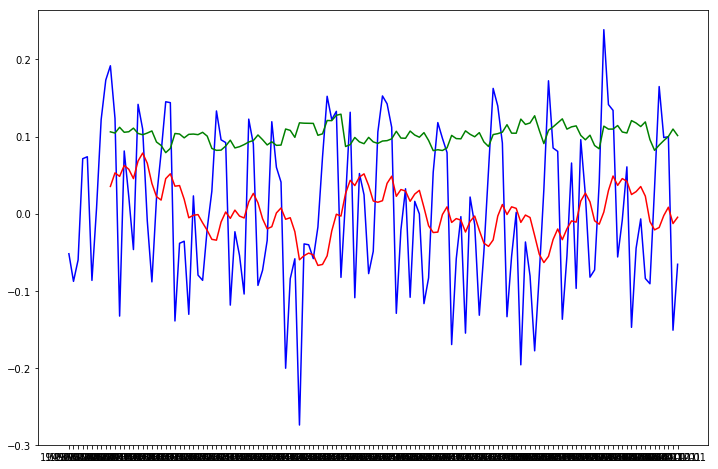

Test Statistic     -3.162093
p-value             0.022286
#logs used         12.000000
#obs used         120.000000
dtype: float64


In [39]:
stationarity_check(df_diff)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.